# Import libraries & dataframe

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\muril\Data Analysis Projects\07-2023 Instacart Basket Analysis\02 Data'

In [3]:
# import dataframe
df = pd.read_pickle(os.path.join(path,'Prepared Data','instacart_wrangled.pkl'))

In [4]:
df_high = pd.read_pickle(os.path.join(path,'Prepared Data','high_activity_customers.pkl'))

## 6 Customer profiling

In [5]:
df_high.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders,activity_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,high


In [6]:
df_high.shape

(30991533, 23)

### 6.1 Age profiling

#### 6.1.1 age_flag creation

In [7]:
# find summary statistics of the ages
df_high['age'].describe()

count    3.099153e+07
mean     4.946796e+01
std      1.848522e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

There are no minors (under-18s). Define 18-35 years old as 'young_adult', 36-64 years old as 'adult' and over-64 years old as 'senior'.

In [8]:
# create age flag
df_high['age_flag'] = df_high['age'].apply(lambda x: 'young_adult' if x < 36 else 'senior' if x > 64 else 'adult')

In [9]:
# check frequencies and total of new age_flag
df_high['age_flag'].value_counts()

adult          14042587
young_adult     8746462
senior          8202484
Name: age_flag, dtype: int64

In [10]:
df_high['age_flag'].value_counts().sum()

30991533

In [11]:
# check against dataframe size
df_high.shape

(30991533, 24)

#### 6.1.2 Visualize distribution of ages

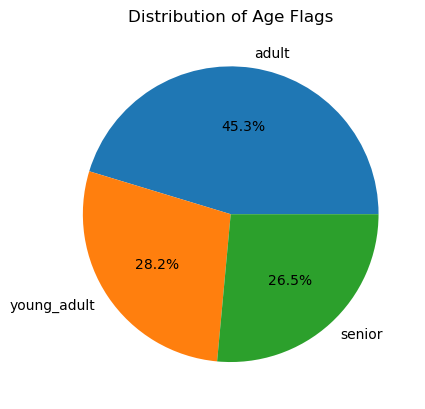

In [12]:
# view pie chart of age_flag

# Calculate the value counts of age_flag
age_flag_counts = df_high['age_flag'].value_counts()

# Create a pie chart
plt.pie(age_flag_counts, labels=age_flag_counts.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Age Flags')

# Display the chart
plt.show()


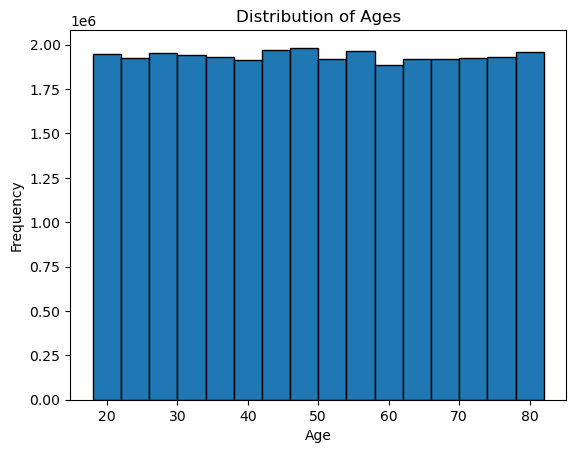

In [13]:
# view distribution of all ages via histogram, bin size 4 years

# Create the histogram
plt.hist(df_high['age'], bins=range(min(df_high['age']), max(df_high['age']) + 4, 4), edgecolor='black')

# Set the x-axis label and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

We can clearly see that there is a very even distribution of ages across highly active customers. The largest age flag are the adults, being a size similar to that of both the young adults and seniors put together. The young adults and seniors account for roughly a quarter of the customer base each.

### 6.2 Income profiling

#### 6.2.1 income_flag creation

In [14]:
# find summary stats of income
df_high['income'].describe()

count    3.099153e+07
mean     9.967334e+04
std      4.313947e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

Using the quartiles as boundaries, define 'low' earners as income less than 67,006, 'high' earners as greater than 127,914 and 'medium' earners as everything in between.

In [15]:
# create income flag
df_high['income_flag'] = df_high['income'].apply(lambda x: 'low' if x < 67006 else 'high' if x > 127914 else 'medium')

In [16]:
# check frequencies and total of new income_flag
df_high['income_flag'].value_counts()

medium    15545201
high       7777017
low        7669315
Name: income_flag, dtype: int64

In [17]:
df_high['income_flag'].value_counts().sum()

30991533

income_flag totals are correct

#### 6.2.2 Visualize income distribution

By definition the distribution of income_flag must be 25% for low earners, 50% for medium earners and 25% for high earners.

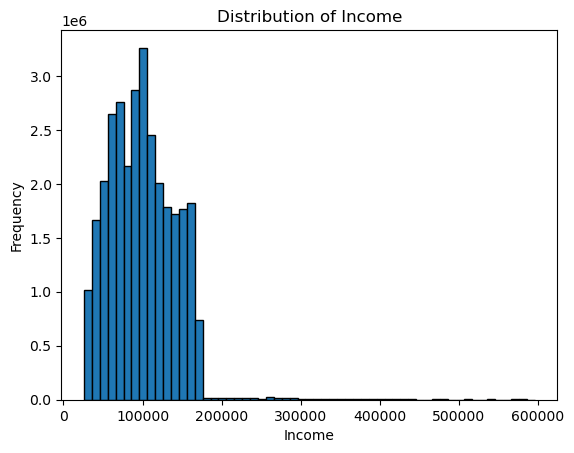

In [18]:
# view distribution of all incomes via histogram, bin size 10000

# Create the histogram
plt.hist(df_high['income'], bins=range(min(df_high['income']), max(df_high['income']) + 10000, 10000), edgecolor='black')

# Set the x-axis label and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Display the histogram
plt.show()

The distribution of income shows positive skew with a right tail. The majority of incomes are centred around 99,675 resembling a normal distribution, but then there are a few customers with much higher incomes once you reach incomes of approximately 180,000.

In [19]:
df_high.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'sex', 'state', 'age', 'date_joined',
       'n_dependents', 'family_status', 'income', 'region', 'number_of_orders',
       'activity_status', 'age_flag', 'income_flag'],
      dtype='object')

In [20]:
df_high['department_id'].value_counts()

4     9079274
16    5191823
19    2766406
7     2571934
1     2123341
13    1782903
3     1125026
15    1012074
20    1003834
9      822136
17     699857
14     677073
12     674785
11     424362
18     410392
6      255991
5      144627
8       93065
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [21]:
df_high['family_status'].value_counts()

married                             21762261
single                               5099036
divorced/widowed                     2647661
living with parents and siblings     1482575
Name: family_status, dtype: int64

### 6.3 Regularity profiling

#### 6.3.1 Percentage occurence of order_day_of_week, grouped by customer

In [22]:
# Calculate the percentages of occurrences
percentages = df_high.groupby(['user_id', 'order_day_of_week']).size() / df_high.groupby('user_id').size() * 100

In [23]:
percentages

user_id  order_day_of_week
1        1                    28.813559
         2                    15.254237
         3                    18.644068
         4                    37.288136
2        1                    32.820513
                                ...    
206209   1                    34.883721
         2                     7.751938
         3                    26.356589
         4                    10.852713
         5                    18.604651
Length: 849935, dtype: float64

In [24]:
# Get the highest percentage occurrence for each user_id
regularity = percentages.groupby('user_id').max()

In [25]:
# Convert percentages Series to DataFrame
percentages_df = percentages.reset_index(name='percentage')

In [26]:
# Calculate the average percentages grouped by user_id
average_percentages = percentages_df.groupby('user_id')['percentage'].mean()

In [27]:
# visual check of dataframe
average_percentages.head()

user_id
1    25.000000
2    20.000000
3    25.000000
4    33.333333
7    16.666667
Name: percentage, dtype: float64

In [28]:
# Create a new DataFrame with user_id and average_percentage column
day_avg_pcntg = pd.DataFrame({'user_id': average_percentages.index, 'average_percentage': average_percentages.values})

In [29]:
# visual check of day_avg_pcntg dataframe
day_avg_pcntg.head()

,user_id,average_percentage
0,1,25.000000
1,2,20.000000
2,3,25.000000
3,4,33.333333
4,7,16.666667


In [30]:
# summary statistics of day_avg_pcntg
day_avg_pcntg['average_percentage'].describe()

count    162632.000000
mean         21.227188
std           8.587118
min          14.285714
25%          14.285714
50%          20.000000
75%          25.000000
max         100.000000
Name: average_percentage, dtype: float64

#### 6.3.2 Regularity flag creation

Define a 'regular' customer as a customer with an average order_day_of_week percentage as greater than 33.3%, otherwise define the customer as 'irregular'.

In [31]:
# create regularity flag
day_avg_pcntg['regularity_flag'] = day_avg_pcntg['average_percentage'].apply(lambda x: 'regular' if x > 100/3 else 'irregular')

In [32]:
# check of dataframe and flag
day_avg_pcntg

,user_id,average_percentage,regularity_flag
0,1,25.000000,irregular
1,2,20.000000,irregular
2,3,25.000000,irregular
3,4,33.333333,irregular
4,7,16.666667,irregular
...,...,...,...
162627,206203,25.000000,irregular
162628,206206,14.285714,irregular
162629,206207,14.285714,irregular
162630,206208,14.285714,irregular


In [33]:
day_avg_pcntg['regularity_flag'].value_counts()

irregular    157732
regular        4900
Name: regularity_flag, dtype: int64

#### 6.3.3 Join regularity_flag to df_high

In [34]:
# reduce memory consumption, delete df
del df

In [35]:
day_avg_pcntg = day_avg_pcntg.drop('average_percentage', axis=1)

In [36]:
user_flags = df_high[['user_id','age_flag','income_flag']]

In [37]:
# Perform inner join and add regularity_flag column to user_flags
user_flags = user_flags.merge(day_avg_pcntg[['user_id', 'regularity_flag']], on='user_id', how='inner')

In [38]:
# visual check of user_flags
user_flags.head()

,user_id,age_flag,income_flag,regularity_flag
0,1,young_adult,low,irregular
1,1,young_adult,low,irregular
2,1,young_adult,low,irregular
3,1,young_adult,low,irregular
4,1,young_adult,low,irregular


In [39]:
# drop duplicates
user_flags = user_flags.drop_duplicates()

#### 6.3.4 Visualise distribution of regular customers

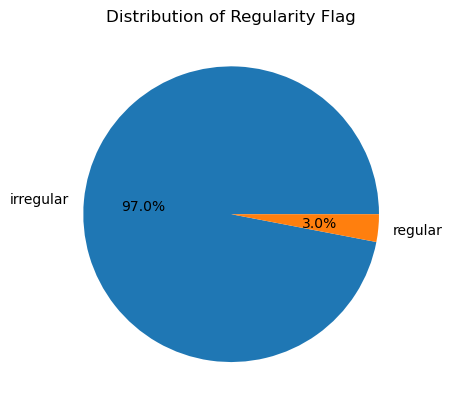

In [40]:
# view pie chart of regularity_flag

# Calculate the value counts of age_flag
user_flag_counts = user_flags['regularity_flag'].value_counts()

# Create a pie chart
plt.pie(user_flag_counts, labels=user_flag_counts.index, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Regularity Flag')

# Display the chart
plt.show()


This distribution may seem odd or surprising, however given that InstaCart is an online service and users are not as constrained by physical logistics, it makes sense that users would place orders on a more ad hoc basis as needed.

### 6.4 Grocery type flag

In [41]:
# import departments dataframe
depts = pd.read_csv(os.path.join(path,'Prepared Data','departments_cleaned.csv'))

In [42]:
# visual check of dataframe
depts

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods
9,10,bulk


#### 6.4.1 Create subset for grocery_flag

In [43]:
# create groceries subset from df_high
groceries = df_high[['user_id', 'department_id']].copy()

In [44]:
groceries

,user_id,department_id
0,1,7
1,1,7
2,1,7
3,1,7
4,1,7
...,...,...
32433021,106143,7
32433022,106143,7
32433023,106143,7
32433024,106143,7


In [45]:
# create frequency table of department_id
grouped_user = groceries.groupby('user_id')['department_id'].value_counts().reset_index(name='frequency')

In [46]:
# visual check of frequency table
grouped_user

,user_id,department_id,frequency
0,1,19,22
1,1,7,13
2,1,16,13
3,1,4,5
4,1,14,3
...,...,...,...
1882226,206209,20,6
1882227,206209,9,3
1882228,206209,1,2
1882229,206209,12,2


In [47]:
# add percentages of the frequencies
grouped_user['percentage'] = grouped_user.groupby('user_id')['frequency'].apply(lambda x: x / x.sum() * 100)

C:\Users\muril\AppData\Local\Temp\ipykernel_20804\1557015141.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_user['percentage'] = grouped_user.groupby('user_id')['frequency'].apply(lambda x: x / x.sum() * 100)


In [48]:
# visual check of frequency table
grouped_user

,user_id,department_id,frequency,percentage
0,1,19,22,37.288136
1,1,7,13,22.033898
2,1,16,13,22.033898
3,1,4,5,8.474576
4,1,14,3,5.084746
...,...,...,...,...
1882226,206209,20,6,4.651163
1882227,206209,9,3,2.325581
1882228,206209,1,2,1.550388
1882229,206209,12,2,1.550388


In [49]:
# rename depts column to prepare for joining
depts = depts.rename(columns={'Unnamed: 0': 'department_id'})

In [50]:
# join depts to grouped_user
groceries_merged = grouped_user.merge(depts, on='department_id', how='inner')


In [51]:
# check merge
groceries_merged

,user_id,department_id,frequency,percentage,department
0,1,19,22,37.288136,snacks
1,2,19,42,21.538462,snacks
2,3,19,9,10.227273,snacks
3,4,19,1,5.555556,snacks
4,7,19,19,9.223301,snacks
...,...,...,...,...,...
1882226,206103,10,1,0.340136,bulk
1882227,206105,10,1,0.165289,bulk
1882228,206108,10,2,0.351494,bulk
1882229,206148,10,1,0.418410,bulk


In [52]:
# add unique department_id count by user_id to groceries_merged
groceries_merged['diversity_count'] = groceries_merged.groupby('user_id')['department_id'].transform('nunique')

In [53]:
# visual check of groceries merged
groceries_merged

,user_id,department_id,frequency,percentage,department,diversity_count
0,1,19,22,37.288136,snacks,7
1,2,19,42,21.538462,snacks,13
2,3,19,9,10.227273,snacks,9
3,4,19,1,5.555556,snacks,9
4,7,19,19,9.223301,snacks,12
...,...,...,...,...,...,...
1882226,206103,10,1,0.340136,bulk,15
1882227,206105,10,1,0.165289,bulk,16
1882228,206108,10,2,0.351494,bulk,16
1882229,206148,10,1,0.418410,bulk,15


In [54]:
groceries_merged = groceries_merged.sort_values(['user_id', 'frequency'], ascending=[True, False])
groceries_merged

,user_id,department_id,frequency,percentage,department,diversity_count
0,1,19,22,37.288136,snacks,7
144544,1,7,13,22.033898,beverages,7
287285,1,16,13,22.033898,dairy,7
440896,1,4,5,8.474576,produce,7
595958,1,14,3,5.084746,breakfast,7
...,...,...,...,...,...,...
1049082,206209,20,6,4.651163,deli,14
1772532,206209,9,3,2.325581,dry goods,14
1184533,206209,1,2,1.550388,frozen,14
1552332,206209,12,2,1.550388,meat seafood,14


In [55]:
# find summary statistics of diversity count
groceries_merged['diversity_count'].describe()

count    1.882231e+06
mean     1.268024e+01
std      3.060886e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.300000e+01
75%      1.500000e+01
max      2.100000e+01
Name: diversity_count, dtype: float64

In [56]:
# create subset that keeps only the top 3 department_id's for each customer
groceries_reduced = groceries_merged.groupby('user_id').apply(lambda x: x.nlargest(3, 'frequency')).reset_index(drop=True)

In [57]:
# visual check of subset
groceries_reduced

,user_id,department_id,frequency,percentage,department,diversity_count
0,1,19,22,37.288136,snacks,7
1,1,7,13,22.033898,beverages,7
2,1,16,13,22.033898,dairy,7
3,2,16,48,24.615385,dairy,13
4,2,19,42,21.538462,snacks,13
...,...,...,...,...,...,...
485519,206208,16,161,23.781388,dairy,17
485520,206208,3,62,9.158050,bakery,17
485521,206209,16,28,21.705426,dairy,14
485522,206209,4,19,14.728682,produce,14


In [58]:
# create subset of user_id, top departments and diversity_count
groceries_top = groceries_reduced.astype({'department_id': str}).groupby('user_id').agg({'diversity_count': 'first', 'department_id': ', '.join, 'department': ', '.join}).reset_index()

In [59]:
# visual check
groceries_top

,user_id,diversity_count,department_id,department
0,1,7,"19, 7, 16","snacks, beverages, dairy"
1,2,13,"16, 19, 4","dairy, snacks, produce"
2,3,9,"4, 16, 19","produce, dairy, snacks"
3,4,9,"7, 1, 4","beverages, frozen, produce"
4,7,12,"4, 7, 16","produce, beverages, dairy"
...,...,...,...,...
162627,206203,13,"4, 7, 16","produce, beverages, dairy"
162628,206206,16,"1, 19, 16","frozen, snacks, dairy"
162629,206207,14,"16, 4, 19","dairy, produce, snacks"
162630,206208,17,"4, 16, 3","produce, dairy, bakery"


#### 6.4.2 Grocery flag creation

Firstly, separate healthy from junk food buyers. If a customer has produce, but not snacks in their department list, flag them as 'healthy'. If a customer has snacks, but not produce in their department list, flag them as 'healthy'. 

In [60]:
# assign healthy flags
groceries_top.loc[(groceries_top['department_id'].str.contains('4')) & (~groceries_top['department_id'].str.contains('19')), 'groceries_flag'] = 'healthy'

In [61]:
# visual check
groceries_top

,user_id,diversity_count,department_id,department,groceries_flag
0,1,7,"19, 7, 16","snacks, beverages, dairy",NaN
1,2,13,"16, 19, 4","dairy, snacks, produce",NaN
2,3,9,"4, 16, 19","produce, dairy, snacks",NaN
3,4,9,"7, 1, 4","beverages, frozen, produce",healthy
4,7,12,"4, 7, 16","produce, beverages, dairy",healthy
...,...,...,...,...,...
162627,206203,13,"4, 7, 16","produce, beverages, dairy",healthy
162628,206206,16,"1, 19, 16","frozen, snacks, dairy",NaN
162629,206207,14,"16, 4, 19","dairy, produce, snacks",NaN
162630,206208,17,"4, 16, 3","produce, dairy, bakery",healthy


In [62]:
# percentage of remaining user_id
groceries_top['groceries_flag'].isnull().sum() / len(groceries_top) * 100

42.031088592650896

In [63]:
# assign junk flags
groceries_top.loc[(groceries_top['department_id'].str.contains('19')) & (~groceries_top['department_id'].str.contains('4')), 'groceries_flag'] = 'junk'

In [64]:
# visual check
groceries_top

,user_id,diversity_count,department_id,department,groceries_flag
0,1,7,"19, 7, 16","snacks, beverages, dairy",junk
1,2,13,"16, 19, 4","dairy, snacks, produce",NaN
2,3,9,"4, 16, 19","produce, dairy, snacks",NaN
3,4,9,"7, 1, 4","beverages, frozen, produce",healthy
4,7,12,"4, 7, 16","produce, beverages, dairy",healthy
...,...,...,...,...,...
162627,206203,13,"4, 7, 16","produce, beverages, dairy",healthy
162628,206206,16,"1, 19, 16","frozen, snacks, dairy",junk
162629,206207,14,"16, 4, 19","dairy, produce, snacks",NaN
162630,206208,17,"4, 16, 3","produce, dairy, bakery",healthy


In [65]:
# percentage of remaining user_id
groceries_top['groceries_flag'].isnull().sum() / len(groceries_top) * 100

32.32574155147818

In [66]:
groceries_top['groceries_flag'].value_counts()

healthy    94276
junk       15784
Name: groceries_flag, dtype: int64

Now separate remaining customers into 'diverse' and 'non-diverse' buyers. Define customers who are more/less than two standard deviations from the mean (12.1 +/- 3.2) 5 or less and 19 or greater) diverse and non-diverse.

In [67]:
# assign diverse flags
groceries_top.loc[(groceries_top['diversity_count'] > 18) & (groceries_top['groceries_flag'].isnull()), 'groceries_flag'] = 'diverse'

In [68]:
# visual check
groceries_top

,user_id,diversity_count,department_id,department,groceries_flag
0,1,7,"19, 7, 16","snacks, beverages, dairy",junk
1,2,13,"16, 19, 4","dairy, snacks, produce",NaN
2,3,9,"4, 16, 19","produce, dairy, snacks",NaN
3,4,9,"7, 1, 4","beverages, frozen, produce",healthy
4,7,12,"4, 7, 16","produce, beverages, dairy",healthy
...,...,...,...,...,...
162627,206203,13,"4, 7, 16","produce, beverages, dairy",healthy
162628,206206,16,"1, 19, 16","frozen, snacks, dairy",junk
162629,206207,14,"16, 4, 19","dairy, produce, snacks",NaN
162630,206208,17,"4, 16, 3","produce, dairy, bakery",healthy


In [69]:
groceries_top[groceries_top['groceries_flag'] == 'diverse'].head(10)

,user_id,diversity_count,department_id,department,groceries_flag
1798,2279,19,"4, 13, 19","produce, pantry, snacks",diverse
2161,2735,19,"16, 3, 13","dairy, bakery, pantry",diverse
3586,4557,19,"7, 4, 19","beverages, produce, snacks",diverse
5275,6668,19,"7, 4, 19","beverages, produce, snacks",diverse
5290,6692,19,"19, 4, 16","snacks, produce, dairy",diverse
5821,7385,20,"4, 16, 19","produce, dairy, snacks",diverse
6730,8524,19,"4, 16, 19","produce, dairy, snacks",diverse
6968,8832,19,"4, 16, 19","produce, dairy, snacks",diverse
7352,9321,19,"4, 16, 19","produce, dairy, snacks",diverse
7373,9349,20,"19, 4, 7","snacks, produce, beverages",diverse


In [70]:
# percentage of remaining user_id
groceries_top['groceries_flag'].isnull().sum() / len(groceries_top) * 100

32.226745044025776

In [71]:
# assign non-diverse flags
groceries_top.loc[(groceries_top['diversity_count'] < 6) & (groceries_top['groceries_flag'].isnull()), 'groceries_flag'] = 'non-diverse'

In [72]:
# percentage of remaining user_id
groceries_top['groceries_flag'].isnull().sum() / len(groceries_top) * 100

29.37490776722908

In [73]:
groceries_top[groceries_top['groceries_flag'] == 'non-diverse'].head(10)

,user_id,diversity_count,department_id,department,groceries_flag
74,88,3,"8, 16, 3","pets, dairy, bakery",non-diverse
90,104,2,"20, 16","deli, dairy",non-diverse
91,105,5,"4, 19, 16","produce, snacks, dairy",non-diverse
98,113,1,17,household,non-diverse
121,144,5,"16, 20, 7","dairy, deli, beverages",non-diverse
176,209,5,"19, 4, 6","snacks, produce, international",non-diverse
203,240,5,"19, 4, 10","snacks, produce, bulk",non-diverse
212,249,3,"4, 19, 13","produce, snacks, pantry",non-diverse
228,271,2,"7, 11","beverages, personal care",non-diverse
263,318,1,7,beverages,non-diverse


Assign all remaining null flags as 'none'. These customers have no notable or unusual spending patterns by grocery type.

In [74]:
# assign none flags
groceries_top['groceries_flag'] = groceries_top['groceries_flag'].fillna('none')

In [75]:
# percentage of remaining user_id
groceries_top['groceries_flag'].isnull().sum() / len(groceries_top) * 100

0.0

In [76]:
groceries_top['groceries_flag'].value_counts()

healthy        94276
none           47773
junk           15784
non-diverse     4638
diverse          161
Name: groceries_flag, dtype: int64

#### 6.4.3 Add groceries_flag to user_flags

In [77]:
# Perform inner join and add groceries_flag column to user_flags
user_flags = user_flags.merge(groceries_top[['user_id', 'groceries_flag']], on='user_id', how='inner')

In [78]:
# visual check of user_flags
user_flags

,user_id,age_flag,income_flag,regularity_flag,groceries_flag
0,1,young_adult,low,irregular,junk
1,15,senior,low,irregular,junk
2,19,adult,high,irregular,none
3,21,senior,medium,irregular,junk
4,31,adult,low,irregular,none
...,...,...,...,...,...
162627,178074,adult,low,irregular,non-diverse
162628,11534,senior,medium,irregular,non-diverse
162629,105857,young_adult,low,irregular,non-diverse
162630,120516,young_adult,medium,irregular,non-diverse


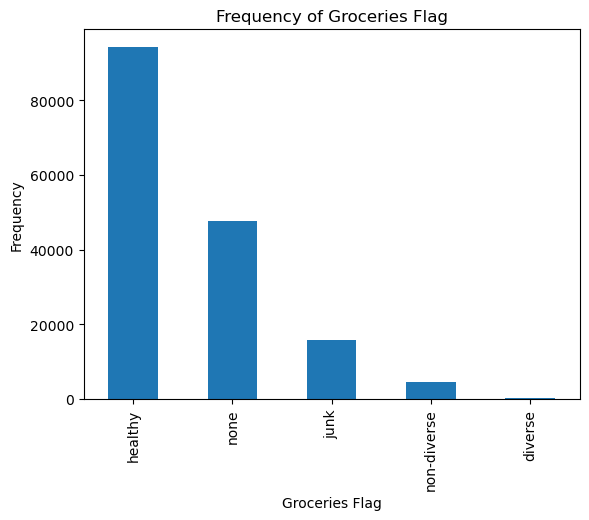

In [79]:
user_flags['groceries_flag'].value_counts().plot(kind='bar')
plt.xlabel('Groceries Flag')
plt.ylabel('Frequency')
plt.title('Frequency of Groceries Flag')
plt.show()

### 6.5 Spending flag

The goal is to find the average weekly spend per customer. We will create a dataframe of customers and the number of days they have been a customer for (sum of days_since_prior_order), the total amount spent (sum of cost) and then the average weekly amount spent (sum of cost divided by sum days_since_prior_order multiplied by 7). Then we will categorise the weekly spend into low, medium and high spending customers.

#### 6.5.1 Average weekly spending per customer

In [80]:
# extract users from df_high
df_spend = df_high.groupby('user_id')['prices'].sum().reset_index()

In [81]:
# visual check
df_spend

,user_id,prices
0,1,375.7
1,2,1465.6
2,3,721.4
3,4,147.7
4,7,1538.2
...,...,...
162627,206203,849.5
162628,206206,2179.3
162629,206207,1630.9
162630,206208,5664.2


In [82]:
# take subset of user_id, order_id and days since prior order from df_high
user_days = df_high[['user_id','order_id','days_since_prior_order']].drop_duplicates()

In [83]:
user_days.head()

,user_id,order_id,days_since_prior_order
0,1,2539329,NaN
1,1,2398795,15.0
2,1,473747,21.0
3,1,2254736,29.0
4,1,431534,28.0


In [84]:
# take sum of days_since_prior_order
user_days = user_days.groupby('user_id')['days_since_prior_order'].sum().reset_index()

In [85]:
user_days.head()

,user_id,days_since_prior_order
0,1,176.0
1,2,198.0
2,3,133.0
3,4,55.0
4,7,203.0


In [86]:
# add total days as customer
df_spend = df_spend.merge(user_days[['user_id','days_since_prior_order']], on='user_id', how='left')

In [88]:
# rename days_since_prior_order to days_as_customer
df_spend = df_spend.rename(columns={'days_since_prior_order': 'days_as_customer'})

In [90]:
# add average weekly spending to the dataframe
df_spend['weekly_spending'] = df_spend.apply(lambda row: row['prices'] if row['days_as_customer'] == 0 else row['prices'] / row['days_as_customer'] * 7, axis=1)

In [91]:
# find summary stats for weekly_spending
df_spend['weekly_spending'].describe()

count    162632.000000
mean         54.964817
std          49.210473
min           0.368421
25%          24.865503
50%          42.520538
75%          70.298280
max        2761.943902
Name: weekly_spending, dtype: float64

#### 6.5.3 Assign spending flags

Using the quartiles as boundaries, define users that spend less than 24.827134 as low, greater than 70.217284 as high and the remainder as medium.

In [92]:
# assign flags to new spending_flag column
df_spend['spending_flag'] = df_spend['weekly_spending'].apply(lambda x: 'low' if x < 24.827134 else ('high' if x > 70.217284 else 'medium'))

In [93]:
# check first 10 rows
df_spend.head(10)

,user_id,prices,days_as_customer,weekly_spending,spending_flag
0,1,375.7,176.0,14.942614,low
1,2,1465.6,198.0,51.814141,medium
2,3,721.4,133.0,37.968421,medium
3,4,147.7,55.0,18.798182,low
4,7,1538.2,203.0,53.041379,medium
5,10,1237.1,79.0,109.616456,high
6,11,782.9,123.0,44.555285,medium
7,12,600.6,100.0,42.042000,medium
8,13,705.4,84.0,58.783333,medium
9,14,1683.0,265.0,44.456604,medium


In [94]:
# add flags to user_flags
user_flags = user_flags.merge(df_spend[['user_id', 'spending_flag']], on='user_id', how='left')

In [95]:
# check first 10 rows of user_flags
user_flags.head(10)

,user_id,age_flag,income_flag,regularity_flag,groceries_flag,spending_flag
0,1,young_adult,low,irregular,junk,low
1,15,senior,low,irregular,junk,low
2,19,adult,high,irregular,none,high
3,21,senior,medium,irregular,junk,medium
4,31,adult,low,irregular,none,high
5,43,adult,medium,irregular,healthy,high
6,52,adult,low,irregular,none,medium
7,67,senior,medium,irregular,none,medium
8,81,adult,medium,irregular,healthy,low
9,82,adult,low,irregular,none,medium


In [96]:
# check counts of spending_flag
user_flags['spending_flag'].describe()

count     162632
unique         3
top       medium
freq       81303
Name: spending_flag, dtype: object

In [97]:
user_flags.shape

(162632, 6)

In [98]:
user_flags['spending_flag'].isnull().sum()

0

Counts return correctly.

### 6.6 Dependents flag

Set a TRUE or FALSE flag for whether a customer has dependents or not.

In [99]:
# create subset of user_id and n_dependents
deps_sub = df_high[['user_id','n_dependents']].drop_duplicates()

In [100]:
# assign TRUE or FALSE flag for has_dependents
deps_sub['has_dependents'] = deps_sub['n_dependents'].apply(lambda x: False if x == 0 else True)

In [101]:
# add has_dependents flag to user_flags
user_flags = user_flags.merge(deps_sub[['user_id','has_dependents']], on = 'user_id', how = 'inner')

In [102]:
# check counts of has_dependents flag
user_flags['has_dependents'].describe()

count     162632
unique         2
top         True
freq      121904
Name: has_dependents, dtype: object

### 6.7 Customer profiles

Using this research as a basis

https://www.driveresearch.com/media/4725/final-2022-grocery-segmentation-report.pdf

We will assign SPECIALIST customer profiles as follows

HEALTHY FAMILIES
+ has dependents
+ adult or young adult
+ medium-high income
+ healthy grocery flag

GROCERY ENTHUSIAST
+ has dependents
+ junk grocery flag
+ low-medium income
+ adults

SIMPLE PLEASURES
+ low income
+ irregular flag
+ junk grocery flag

YOUNG SPENDER
+ young adult
+ diverse flag
+ medium-high income

FRUGAL DIY
+ senior
+ low spending flag
+ low diversity


All remaining customers will be profiled as follows, in this order:

PROFESSIONALS
+ young adult or adult
+ medium-high income

FAMILY
+ has dependents

BUDGET
+ low income

SENIOR
+ senior

#### 6.7.1 Assign HEALTHY FAMILIES profile

In [103]:
# add empty column ready to be populated
user_flags['profile'] = None

In [104]:
# assign healthy_families flags
user_flags.loc[
    (user_flags['has_dependents'] == True) &
    (user_flags['age_flag'].isin(['young_adult', 'adult'])) &
    (user_flags['income_flag'].isin(['medium', 'high'])) &
    (user_flags['groceries_flag'] == 'healthy'),
    'profile'
] = 'healthy_families'

In [105]:
# check counts
user_flags['profile'].describe()

count                37479
unique                   1
top       healthy_families
freq                 37479
Name: profile, dtype: object

#### 6.7.2 Assign GROCERIES ENTHUSIAST profiles

In [106]:
# Assign groceries_enthusiast flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'] == 'adult') &
    (user_flags['has_dependents'] == True) &
    (user_flags['income_flag'].isin(['low','medium'])) &
    (user_flags['groceries_flag'] == 'junk'),
    'profile'
] = 'groceries_enthusiast'

In [107]:
# check counts
user_flags['profile'].value_counts()

healthy_families        37479
groceries_enthusiast     4070
Name: profile, dtype: int64

#### 6.7.3 Assign SIMPLE PLEASURES profile

In [108]:
# Assign simple_pleasures flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['regularity_flag'] == 'irregular') &
    (user_flags['income_flag'] == 'low') &
    (user_flags['groceries_flag'] == 'junk'),
    'profile'
] = 'simple_pleasure'

In [109]:
# check counts
user_flags['profile'].value_counts()

healthy_families        37479
simple_pleasure          4967
groceries_enthusiast     4070
Name: profile, dtype: int64

#### 6.7.4 Assign YOUNG SPENDER profiles

In [110]:
# Assign young_spender flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'] == 'young_adult') &
    (user_flags['income_flag'].isin(['medium','high'])) &
    (user_flags['groceries_flag'] == 'diverse'),
    'profile'
] = 'young_spender'

In [111]:
# check counts
user_flags['profile'].value_counts()

healthy_families        37479
simple_pleasure          4967
groceries_enthusiast     4070
young_spender              21
Name: profile, dtype: int64

#### 6.7.5 Assign FRUGAL DIY profiles

In [112]:
# Assign frugal_diy flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'] == 'senior') &
    (user_flags['spending_flag'] == 'low') &
    (user_flags['groceries_flag'] == 'non-diverse'),
    'profile'
] = 'frugal_diy'

In [113]:
# check counts
user_flags['profile'].value_counts()

healthy_families        37479
simple_pleasure          4967
groceries_enthusiast     4070
frugal_diy               1068
young_spender              21
Name: profile, dtype: int64

In [114]:
# Assign frugal_diy flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'] == 'senior') &
    (user_flags['spending_flag'] == 'low') &
    (user_flags['groceries_flag'] == 'non-diverse'),
    'profile'
] = 'frugal_diy'

#### 6.7.6 Assign PROFESSIONAL profiles

In [115]:
# Assign professional flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'].isin(['young_adult','adult'])) &
    (user_flags['income_flag'].isin(['medium','high'])),
    'profile'
] = 'professional'

In [116]:
# check counts
user_flags['profile'].value_counts()

professional            40092
healthy_families        37479
simple_pleasure          4967
groceries_enthusiast     4070
frugal_diy               1068
young_spender              21
Name: profile, dtype: int64

#### 6.7.7 Assign FAMILY profiles

In [117]:
# Assign family flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['has_dependents'] == True ),
    'profile'
] = 'family'

In [118]:
# check counts
user_flags['profile'].value_counts()

family                  56154
professional            40092
healthy_families        37479
simple_pleasure          4967
groceries_enthusiast     4070
frugal_diy               1068
young_spender              21
Name: profile, dtype: int64

#### 6.7.8 Assign BUDGET profiles

In [119]:
# Assign budget flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['income_flag'] == 'low' ),
    'profile'
] = 'budget'

In [120]:
# check counts
user_flags['profile'].value_counts()

family                  56154
professional            40092
healthy_families        37479
budget                  10152
simple_pleasure          4967
groceries_enthusiast     4070
frugal_diy               1068
young_spender              21
Name: profile, dtype: int64

#### 6.7.9 Assign SENIOR profiles

In [121]:
# Assign senior flags
user_flags.loc[
    (user_flags['profile'].isnull()) &
    (user_flags['age_flag'] == 'senior' ),
    'profile'
] = 'senior'

In [122]:
# check counts
user_flags['profile'].value_counts()

family                  56154
professional            40092
healthy_families        37479
budget                  10152
senior                   8629
simple_pleasure          4967
groceries_enthusiast     4070
frugal_diy               1068
young_spender              21
Name: profile, dtype: int64

In [123]:
# check counts
user_flags['profile'].value_counts().sum()

162632

In [124]:
user_flags.shape

(162632, 8)

Counts return correctly.

In [125]:
# export user_flags
user_flags.to_csv(os.path.join(path, 'Prepared Data', 'user_flags.csv'))

## 7. Profile analysis

In [126]:
# drop individual profile flags from df_high
df_high = df_high.drop(['activity_status', 'age_flag', 'income_flag'], axis=1)

In [127]:
# add profiles to df_high
df_high = df_high.merge(user_flags[['user_id', 'profile']], on='user_id', how='left')

In [128]:
df_high.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,sex,state,age,date_joined,n_dependents,family_status,income,region,number_of_orders,profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,simple_pleasure
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,simple_pleasure
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,simple_pleasure
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,simple_pleasure
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,simple_pleasure


### 7.1 Distribution of profiles

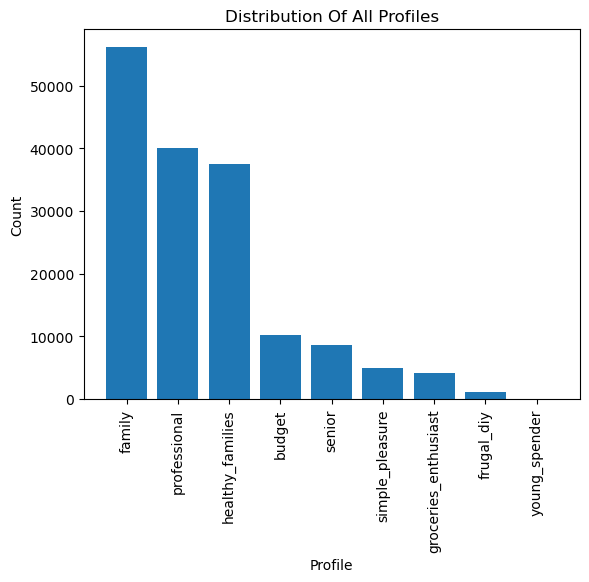

In [129]:
# construct bar chart of profiles

# Count the occurrences of each profile
profile_counts = user_flags['profile'].value_counts()

# Create a bar chart
plt.bar(profile_counts.index, profile_counts.values)

# Set the x-axis labels
plt.xlabel('Profile')

# Set the y-axis labels
plt.ylabel('Count')

# Set the chart title
plt.title('Distribution Of All Profiles')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the chart
plt.show()

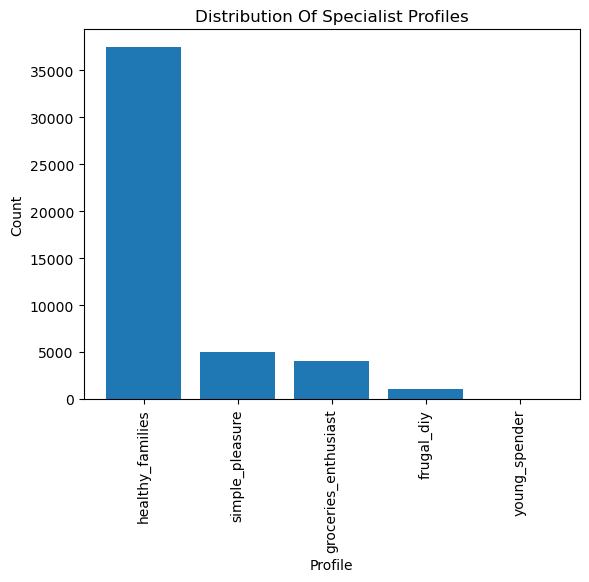

In [130]:
# construct bar chart showing the distribution of the specialist profiles

# Define the desired profiles
desired_profiles = ['healthy_families', 'simple_pleasure', 'groceries_enthusiast', 'young_spender', 'frugal_diy']

# Filter the DataFrame based on the desired profiles
filtered_flags = user_flags[user_flags['profile'].isin(desired_profiles)]

# Count the occurrences of each profile
profile_counts = filtered_flags['profile'].value_counts()

# Create a bar chart
plt.bar(profile_counts.index, profile_counts.values)

# Set the x-axis labels
plt.xlabel('Profile')

# Set the y-axis labels
plt.ylabel('Count')

# Set the chart title
plt.title('Distribution Of Specialist Profiles')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the chart
plt.show()


### 7.2 Summary statistics for profiles 

We will find summary statistics for profiles on usage frequency and expenditure and analyse by region.
Create dataframe that contains user_id, profile, region, days_as_customer, total_spending, total_orders, weekly_orders, weekly_spending, order_frequency. df_spend already contains some of this data.

#### 7.2.1 Construct dataframe

In [131]:
df_spend.head()

,user_id,prices,days_as_customer,weekly_spending,spending_flag
0,1,375.7,176.0,14.942614,low
1,2,1465.6,198.0,51.814141,medium
2,3,721.4,133.0,37.968421,medium
3,4,147.7,55.0,18.798182,low
4,7,1538.2,203.0,53.041379,medium


In [132]:
# drop spending_flag
df_spend = df_spend.drop('spending_flag', axis=1)

In [133]:
# rename prices to total_spending
df_spend = df_spend.rename(columns={'prices' : 'total_spending'})

In [134]:
# take subset of users and regions from df_high ready for merge
user_region = df_high[['user_id','region']].drop_duplicates()

In [135]:
# add regions to df_spend
df_spend = df_spend.merge(user_region[['user_id','region']], on='user_id', how='left')

In [136]:
# remove user_region for memory
del user_region

In [137]:
# add profiles to df_spend
df_spend = df_spend.merge(user_flags[['user_id','profile']], on='user_id', how='left')

In [138]:
df_high.groupby('user_id')['order_id'].nunique().reset_index()

,user_id,order_id
0,1,10
1,2,14
2,3,12
3,4,5
4,7,20
...,...,...
162627,206203,5
162628,206206,67
162629,206207,16
162630,206208,49


In [139]:
# add number of orders to df_spend
df_spend = df_spend.merge(df_high.groupby('user_id')['order_id'].nunique().reset_index(), on='user_id', how='left')

In [140]:
# rename order_id to number_of_orders
df_spend = df_spend.rename(columns={'order_id' : 'number_of_orders'})

In [141]:
# add average weekly order to df_spend
df_spend['weekly_orders'] = df_spend.apply(lambda row: row['number_of_orders'] if row['days_as_customer'] == 0 else row['number_of_orders'] / row['days_as_customer'] * 7, axis=1)

In [142]:
# add order frequency that is the average number of weeks between each order
df_spend["avg_order_frequency"] = 1 / df_spend["weekly_orders"]

In [143]:
# export dataframes for analysis in new notebook
df_high.to_csv(os.path.join(path, 'Prepared Data', 'high_activity_customers.csv'))

In [144]:
df_spend.to_csv(os.path.join(path, 'Prepared Data', 'profiling.csv'))